In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

Blues


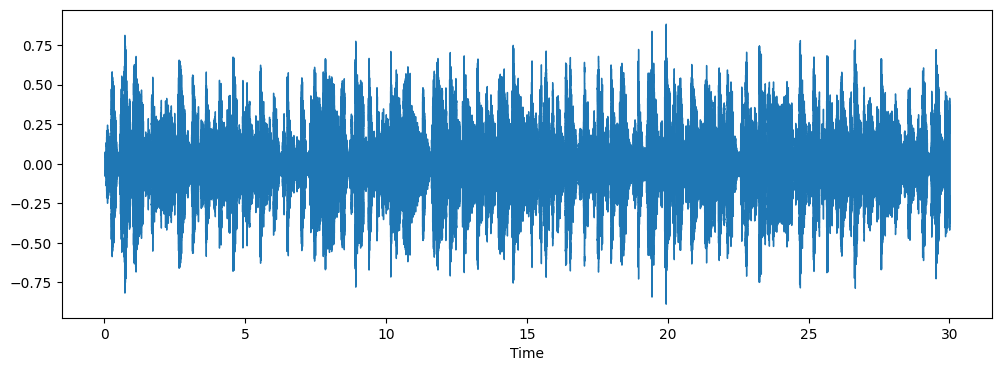

In [63]:
plt.figure(figsize=(12, 4))
y, sr = librosa.load('dataset/genres_original/blues/blues.00000.wav')
librosa.display.waveshow(y, sr=sr)

print("Blues")

Classical


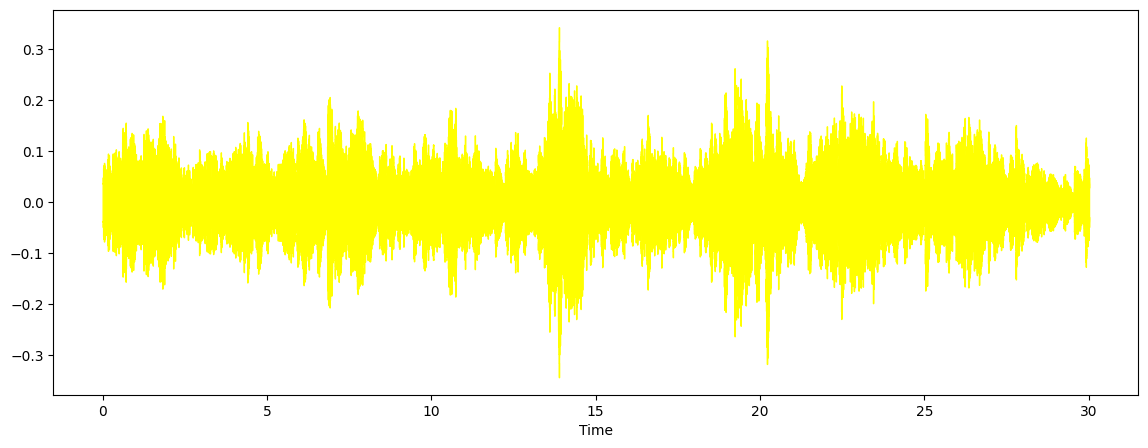

In [64]:
plt.figure(figsize=(14, 5))
x, sr = librosa.load('dataset/genres_original/classical/classical.00000.wav')
librosa.display.waveshow(x, sr=sr,color='yellow')

print("Classical")

Country


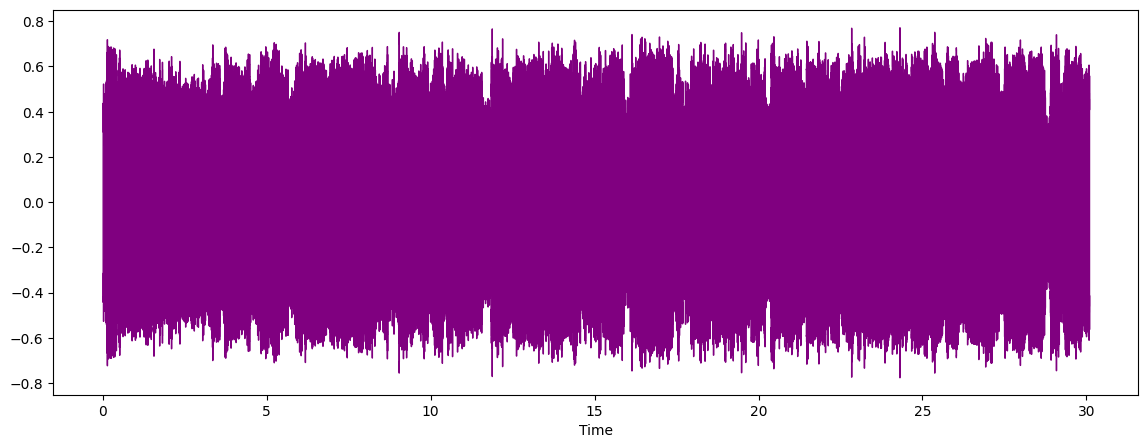

In [65]:
plt.figure(figsize=(14, 5))
x, sr = librosa.load('dataset/genres_original/country/country.00000.wav')
librosa.display.waveshow(x, sr=sr,color='purple')

print("Country")

Disco


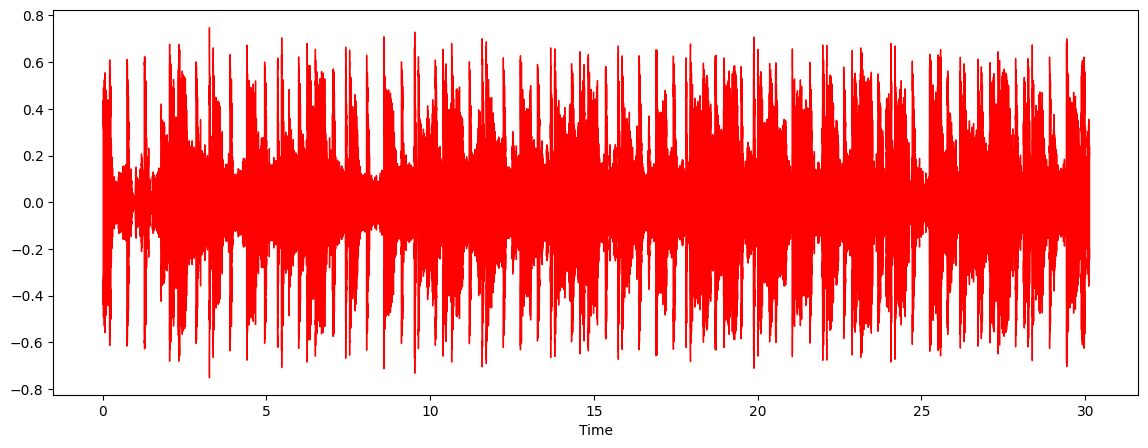

In [66]:
plt.figure(figsize=(14, 5))
x, sr = librosa.load('dataset/genres_original/disco/disco.00000.wav')
librosa.display.waveshow(x, sr=sr,color='red')

print("Disco")

Jazz


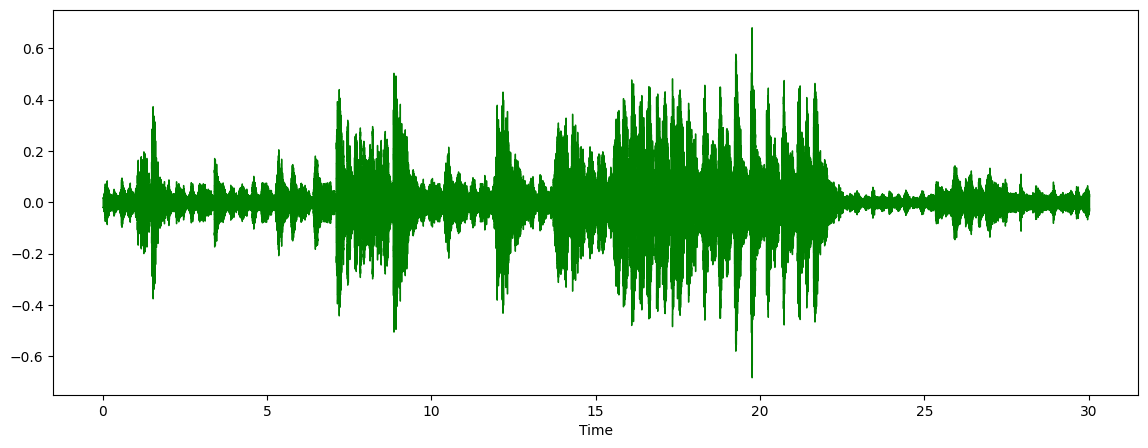

In [67]:
plt.figure(figsize=(14, 5))
x, sr = librosa.load('dataset/genres_original/jazz/jazz.00000.wav')
librosa.display.waveshow(x, sr=sr,color='green')

print("Jazz")

Pop


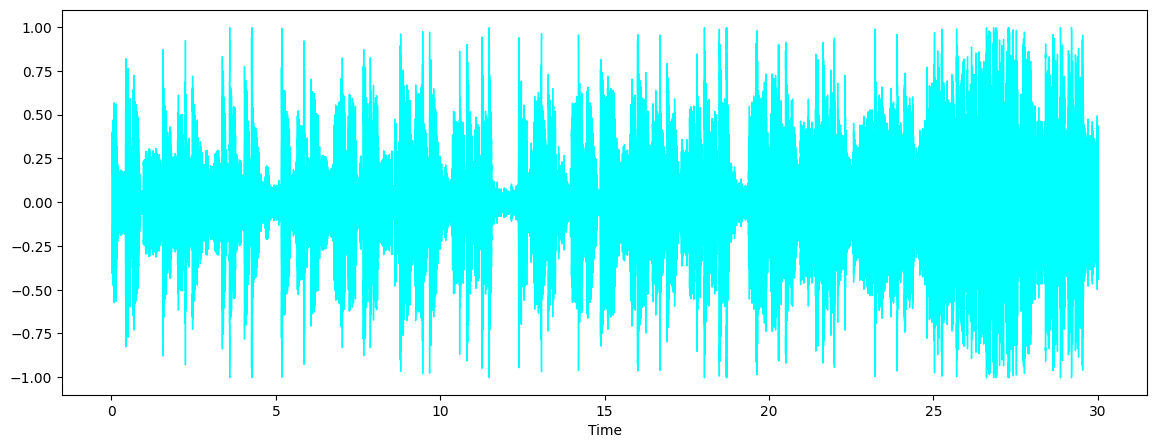

In [68]:
plt.figure(figsize=(14, 5))
x, sr = librosa.load('dataset/genres_original/pop/pop.00000.wav')
librosa.display.waveshow(x, sr=sr,color='cyan')

print("Pop")

In [69]:
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    harmony = y_harmonic
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    features = {
        'Chroma': chroma,
        'Spectral Centroid': spectral_centroid,
        'Spectral Bandwidth': spectral_bandwidth,
        'Zero Crossing Rate': zero_crossing_rate,
        'Harmony': harmony,
        'MFCCs': mfccs
    }
    return features

In [70]:
audio_path = 'dataset/genres_original/blues/blues.00000.wav'
features = extract_audio_features(audio_path)

In [71]:
for feature_name, feature_value in features.items():
    print(f"{feature_name} average: {feature_value}")

Chroma average: [[0.33112544 0.2349237  0.8714164  ... 0.15691069 0.87786233 1.        ]
 [0.39392966 0.29400364 0.68826514 ... 0.13222212 0.6850759  0.72816896]
 [0.42932406 0.41955495 0.5160274  ... 0.25044864 0.5649645  0.40339905]
 ...
 [1.         1.         1.         ... 0.26199484 0.9551487  0.8657351 ]
 [0.42033246 0.36797956 0.6217584  ... 1.         1.         0.98580563]
 [0.30348283 0.19700047 0.64925474 ... 0.62876093 0.71722466 0.8162657 ]]
Spectral Centroid average: [[2122.97749428 2102.62106711 1955.28567059 ... 1490.45683883
  1507.40420474 1439.64315882]]
Spectral Bandwidth average: [[2283.08439586 2247.35232093 2308.61530251 ... 1515.84393596
  1735.2594234  1764.34080935]]
Zero Crossing Rate average: [[0.06494141 0.08300781 0.10791016 ... 0.08642578 0.06933594 0.04589844]]
Harmony average: [ 0.00691394  0.01504066  0.00982569 ... -0.01754523 -0.01378523
 -0.00839919]
MFCCs average: [[-240.63542    -211.21436    -193.90889    ... -109.999146
   -86.81443     -84.073

In [72]:
df = pd.read_csv('dataset/mgc.csv')
df.head(5)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [73]:
df['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

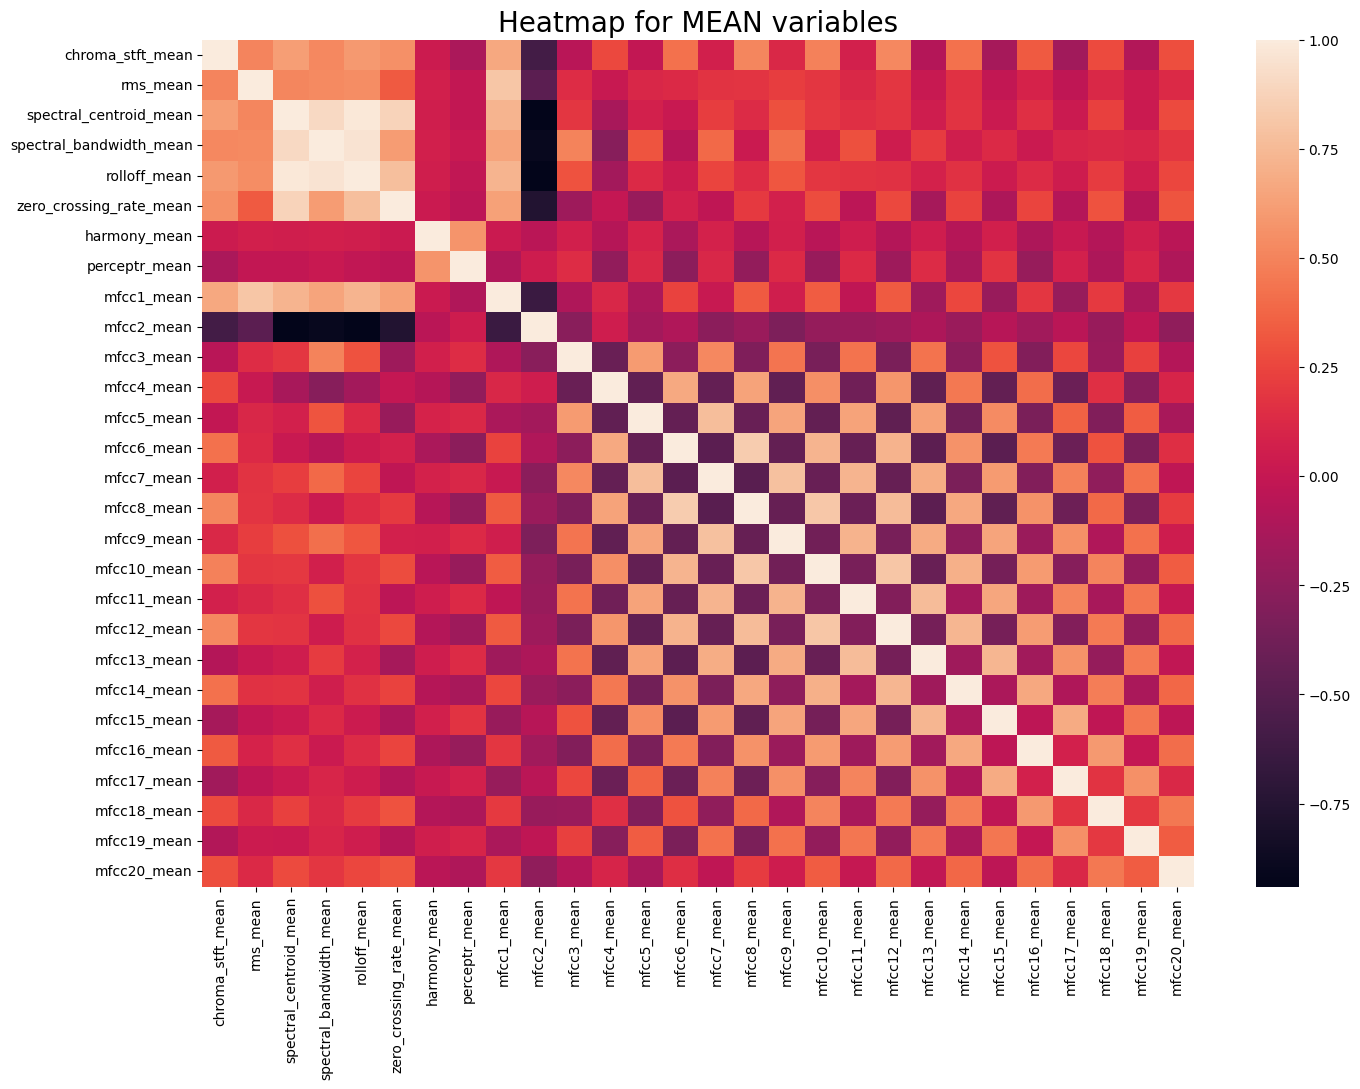

In [74]:
spike_cols = [col for col in df.columns if 'mean' in col]
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(df[spike_cols].corr())

plt.title('Heatmap for MEAN variables', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Model Implementation

In [83]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Preprocessing


In [84]:
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [85]:
X = df.drop(['label','filename'],axis=1)
y = df['label']

In [86]:
cols = X.columns
minmax = preprocessing.MinMaxScaler()
np_scaled = minmax.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 58), (300, 58), (700,), (300,))

## KNN & XGBoost

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

for clf in (knn, xgb):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, preds))

KNeighborsClassifier 0.6933333333333334
XGBClassifier 0.7866666666666666


## Dense Neural Network Model

In [89]:
import tensorflow.keras as keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dense, Dropout

In [90]:
model = Sequential() 
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax'))
model.summary()

/Users/vaibhav/Desktop/MusicGenre/mgc/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [91]:
adam = keras.optimizers.Adam(learning_rate=1e-5) 
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

hist = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 100, batch_size = 32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0967 - loss: 2.5093 - val_accuracy: 0.1400 - val_loss: 2.2842
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1493 - loss: 2.4558 - val_accuracy: 0.1500 - val_loss: 2.2785
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1333 - loss: 2.4305 - val_accuracy: 0.1800 - val_loss: 2.2722
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1273 - loss: 2.4400 - val_accuracy: 0.1967 - val_loss: 2.2654
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1562 - loss: 2.3678 - val_accuracy: 0.2100 - val_loss: 2.2581
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1491 - loss: 2.3196 - val_accuracy: 0.2233 - val_loss: 2.2501
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1818 - loss: 2.2535 - val_accuracy: 0.2433 - val_loss: 2.2412
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2188 - loss: 2.2467 - val_accuracy: 0.

In [92]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1) 
print(f"Test accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 1.2092 
Test accuracy: 0.6100000143051147


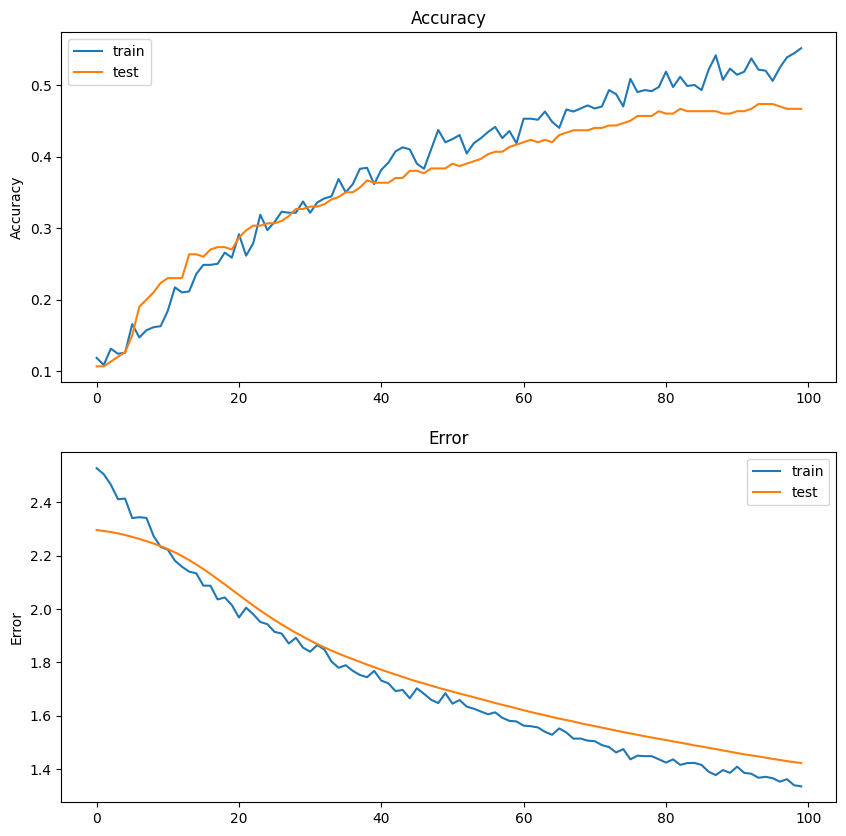

In [27]:
fig, axs = plt.subplots(2,figsize=(10,10)) 

axs[0].plot(hist.history["accuracy"], label="train") 
axs[0].plot(hist.history["val_accuracy"], label="test")     
axs[0].set_ylabel("Accuracy") 
axs[0].legend() 
axs[0].set_title("Accuracy") 

axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
plt.show()

# CNN Using Spectrogram

In [22]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def plot_spectrogram(file):
    y, sr = librosa.load(f'dataset/genres_original/{file}/{file}.00000.wav')
    ft = np.abs(librosa.stft(y, n_fft=2048,  hop_length=512))
    ft_dB = librosa.amplitude_to_db(ft, ref=np.max)
    plt.figure(figsize=(7, 5))
    librosa.display.specshow(ft_dB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    print(file)

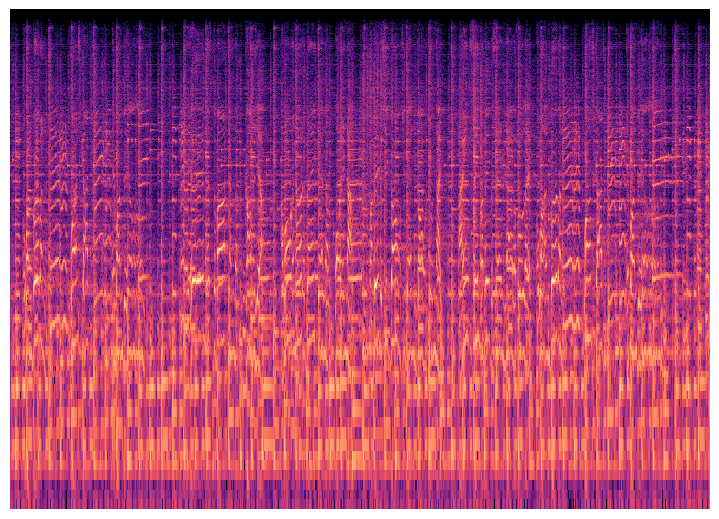

blues


In [24]:
plot_spectrogram('blues')

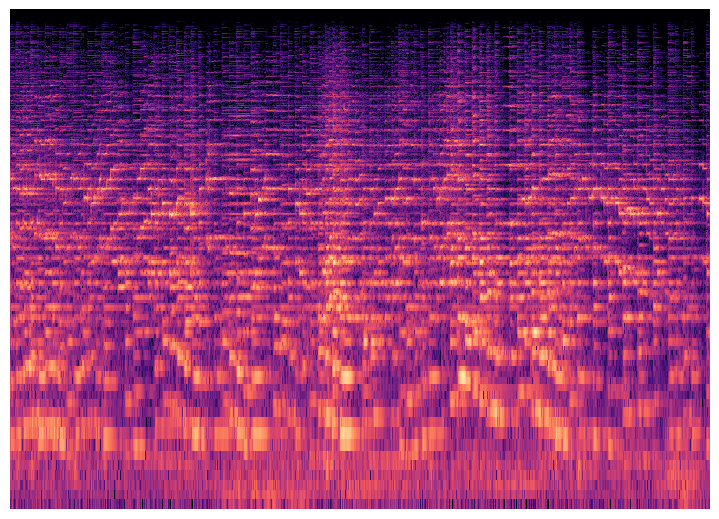

classical


In [25]:
plot_spectrogram('classical')

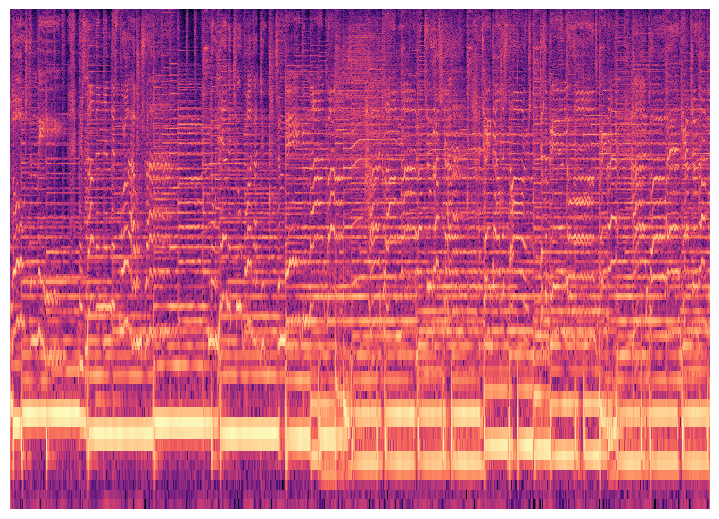

country


In [26]:
plot_spectrogram('country')

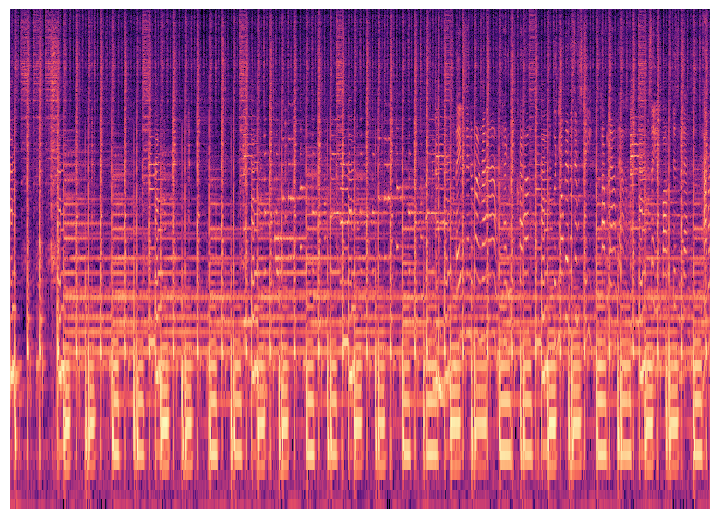

disco


In [27]:
plot_spectrogram('disco')

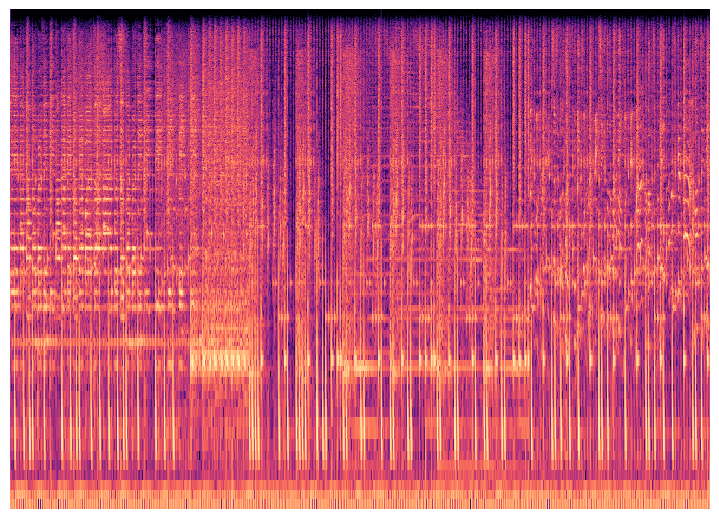

hiphop


In [28]:
plot_spectrogram('hiphop')

In [12]:
import os
from tqdm import tqdm

path='dataset/genres_original/'
specimgpath = 'dataset/spectrogram_images/'

print('Generating Spectrogram Images from .wav files')
for genre in sorted(os.listdir(f'{path}/')):
    os.makedirs(f'{specimgpath}/{genre}', exist_ok=True)
    for img in tqdm(sorted(os.listdir(f'{path}/{genre}')), desc=genre):
        imgparts = img.split('.')
        imgname = f'{os.path.join(specimgpath,genre)}/{imgparts[0]}{imgparts[1]}.png'
        try:
            y,sr = librosa.load(os.path.join(path,genre,img))
            ft = np.abs(librosa.stft(y, n_fft=2048,  hop_length=512))
            ft_dB = librosa.amplitude_to_db(ft, ref=np.max)
            librosa.display.specshow(ft_dB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
            plt.axis('off')
            plt.tight_layout(pad=0)
            plt.savefig(imgname)
            plt.close()
        except:
            continue
print('Done.......')


Generating Spectrogram Images from .wav files


rock: 100%|██████████| 100/100 [00:00<00:00, 620459.17it/s]

Done.......


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2
import os
from tqdm import tqdm

In [30]:
dataset_path = 'dataset/spectrogram_images/'

In [31]:
iii = 'dataset/spectrogram_images/blues/blues00001.png'
im = cv2.imread(iii)
print(im.shape)

(480, 640, 3)


In [32]:
img_width, img_height = 224, 224
batch_size = 32
num_classes = 10
epochs = 50

In [33]:
def load_data(path):
    images = []
    labels = []
    genres = os.listdir(path)
    label_dict = {genre: i for i, genre in enumerate(genres)}
    for genre in sorted(genres):
        genre_path = os.path.join(path, genre)
        file_names = os.listdir(genre_path)
        for file in tqdm(file_names, desc=genre):
            img_path = os.path.join(genre_path, file)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label_dict[genre])
            
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [34]:
images, labels = load_data(dataset_path)
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

rock: 100%|██████████| 100/100 [00:00<00:00, 113.07it/s]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

In [18]:
model = Sequential([
    # First convolutional layer with Batch Normalization
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Second convolutional layer
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    # Third convolutional layer
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Fourth convolutional layer
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Fifth convolutional layer
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Flattening the 2D arrays for fully connected layers
    Flatten(),
    
    # First fully connected layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    # Second fully connected layer
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    # Output layer with softmax activation for classification
    Dense(num_classes, activation='softmax')
])

/Users/vaibhav/Desktop/MusicGenre/mgc/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-08 01:24:38.839758: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-08 01:24:38.839793: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-05-08 01:24:38.839796: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-05-08 01:24:38.839816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-08 01:24:38.839831: I tensorflow/core/common_runtime/pluggable_device/pluggable_de

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 640, 480, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 640, 480, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 320, 240, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 320, 240, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 320, 240, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 160, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 160, 120, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 160, 120, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 80, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 80, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 40, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 40, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 30, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 76800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    39,322,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,02

 Total params: 39,853,674 (152.03 MB)

 Trainable params: 39,851,146 (152.02 MB)

 Non-trainable params: 2,528 (9.88 KB)

In [ ]:
model.fit(train_generator, steps_per_epoch=len(x_train)//batch_size, epochs=epochs, validation_data=test_generator,
validation_steps=len(x_test)//batch_size)

In [49]:
model.save('genre.h5')

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

image_path = '/Users/vaibhav/Desktop/MusicGenre/dataset/spectrogram_images/classical/classical00010.png'
img = image.load_img(image_path, target_size=(480, 640))
img_array = image.img_to_array(img) / 255.0
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)

predicted_class = np.argmax(prediction, axis=1)
class_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
predicted_class_label = class_labels[predicted_class[0]]

print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted class: pop


In [23]:
x_test_scaled = x_test / 255.0

# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test, verbose=1)

# Print the accuracy
print("Accuracy on test set:", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.0752 - loss: 2.3120
Accuracy on test set: 0.07500000298023224


In [45]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [52]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(480, 640, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [53]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [54]:
# Creating the final model
modelvgg = Model(inputs=base_model.input, outputs=predictions)

In [55]:
modelvgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
modelvgg.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 480, 640, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 480, 640, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 480, 640, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 240, 320, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 240, 320, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 240, 320, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 120, 160, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 120, 160, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 120, 160, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 120, 160, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 60, 80, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 60, 80, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 60, 80, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 60, 80, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 30, 40, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 30, 40, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 30, 40, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 30, 40, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 15, 20, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,930,314 (60.77 MB)

 Trainable params: 1,215,626 (4.64 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [57]:
modelvgg.fit(train_generator, steps_per_epoch=len(x_train)//batch_size, epochs=100, validation_data=test_generator,
validation_steps=len(x_test)//batch_size)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.0908 - loss: 2.3530 - val_accuracy: 0.2083 - val_loss: 2.2505
Epoch 2/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.0968 - loss: 2.2572

2024-05-08 01:33:24.064163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:33:24.064178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-05-08 01:33:24.064393: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:33:24.064398: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:33:24.064404: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:33:24.064408: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-0

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0968 - loss: 2.2572 - val_accuracy: 0.2500 - val_loss: 2.2449
Epoch 3/100


2024-05-08 01:33:24.450789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:33:24.450806: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:33:24.450810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:33:24.450814: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:33:24.450817: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:33:24.450820: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:33:24

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1736 - loss: 2.2070 - val_accuracy: 0.2760 - val_loss: 1.9584
Epoch 4/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3125 - loss: 1.8962

2024-05-08 01:34:08.360837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:34:08.361033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-05-08 01:34:08.361053: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13345702722027272769
2024-05-08 01:34:08.361060: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1942400227399396283
2024-05-08 01:34:08.361264: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7245850908134532450
2024-05-08 01:34:08.361273: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15592090366944188588
2024-05-

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3125 - loss: 1.8962 - val_accuracy: 0.2500 - val_loss: 2.0407
Epoch 5/100


2024-05-08 01:34:08.736409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:34:08.736424: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:34:08.736428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:34:08.736432: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:34:08.736435: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:34:08.736438: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:34:08

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2550 - loss: 1.9288 - val_accuracy: 0.2292 - val_loss: 1.9820
Epoch 6/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2581 - loss: 1.9100

2024-05-08 01:34:51.978723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:34:51.978741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_11_1/dropout_3_1/add/_52]]
2024-05-08 01:34:51.978767: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:34:51.978775: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2333652309480271481
2024-05-08 01:34:51.978778: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:34:51.978787: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2581 - loss: 1.9100 - val_accuracy: 0.0000e+00 - val_loss: 2.1418
Epoch 7/100


2024-05-08 01:34:52.331320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:34:52.331336: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:34:52.331340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:34:52.331343: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:34:52.331346: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:34:52.331350: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:34:52

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3548 - loss: 1.7763 - val_accuracy: 0.3854 - val_loss: 1.6768
Epoch 8/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3750 - loss: 1.5130

2024-05-08 01:35:35.805394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:35:35.805595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_2/_34]]
2024-05-08 01:35:35.805608: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:35:35.805614: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:35:35.805624: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:35:35.805625: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1446037933

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3750 - loss: 1.5130 - val_accuracy: 0.5000 - val_loss: 1.5714
Epoch 9/100


2024-05-08 01:35:36.173478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:35:36.173495: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:35:36.173499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:35:36.173502: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:35:36.173505: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:35:36.173508: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:35:36

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3786 - loss: 1.6525 - val_accuracy: 0.4427 - val_loss: 1.5848
Epoch 10/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4062 - loss: 1.5230

2024-05-08 01:36:19.942379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:36:19.942581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 01:36:19.942594: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:36:19.942602: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:36:19.942606: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:36:19.942615: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4062 - loss: 1.5230 - val_accuracy: 0.3750 - val_loss: 1.6678
Epoch 11/100


2024-05-08 01:36:20.321898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:36:20.321915: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:36:20.321919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:36:20.321923: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:36:20.321925: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:36:20.321928: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:36:20

24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4370 - loss: 1.5660 - val_accuracy: 0.3646 - val_loss: 1.6912
Epoch 12/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4516 - loss: 1.4162

2024-05-08 01:37:03.078353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:37:03.078372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_2/_34]]
2024-05-08 01:37:03.078380: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:37:03.078382: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:37:03.078389: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:37:03.078393: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 971524922

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4516 - loss: 1.4162 - val_accuracy: 0.5000 - val_loss: 1.3117
Epoch 13/100


2024-05-08 01:37:03.425186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:37:03.425202: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:37:03.425206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:37:03.425209: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:37:03.425212: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:37:03.425215: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:37:03

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4498 - loss: 1.5372 - val_accuracy: 0.4740 - val_loss: 1.4784
Epoch 14/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3125 - loss: 1.7788

2024-05-08 01:37:46.720049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:37:46.720073: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:37:46.720077: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:37:46.720080: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:37:46.720084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_20/_30]]
2024-05-08 01:37:46.720116: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 128770019

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3125 - loss: 1.7788 - val_accuracy: 0.3750 - val_loss: 1.4517
Epoch 15/100


2024-05-08 01:37:47.027936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:37:47.027953: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:37:47.027957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:37:47.027961: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:37:47.027964: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:37:47.027967: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:37:47

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4332 - loss: 1.5133 - val_accuracy: 0.5052 - val_loss: 1.4505
Epoch 16/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5000 - loss: 1.3108

2024-05-08 01:38:30.762209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:38:30.762237: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15374141849207620402
2024-05-08 01:38:30.762242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/ArgMax_1/_68]]
2024-05-08 01:38:30.762278: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:38:30.762309: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:38:30.762319: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5000 - loss: 1.3108 - val_accuracy: 0.3750 - val_loss: 1.6972
Epoch 17/100


2024-05-08 01:38:31.072244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:38:31.072265: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:38:31.072269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:38:31.072273: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:38:31.072276: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:38:31.072279: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:38:31

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4680 - loss: 1.4728 - val_accuracy: 0.4948 - val_loss: 1.4367
Epoch 18/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4688 - loss: 1.1883

2024-05-08 01:39:14.420866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:39:14.421707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/Shape/_54]]
2024-05-08 01:39:14.421720: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:39:14.421724: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:39:14.421731: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:39:14.421736: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 986251446023191

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4688 - loss: 1.1883 - val_accuracy: 0.6250 - val_loss: 1.1385
Epoch 19/100


2024-05-08 01:39:14.728649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:39:14.728663: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:39:14.728667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:39:14.728670: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:39:14.728673: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:39:14.728676: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:39:14

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4990 - loss: 1.3909 - val_accuracy: 0.5052 - val_loss: 1.3805
Epoch 20/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4688 - loss: 1.4377

2024-05-08 01:39:58.159111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:39:58.159340: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:39:58.159344: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15374141849207620402
2024-05-08 01:39:58.159348: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:39:58.159351: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7245850908134532450
2024-05-08 01:39:58.159354: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9159991324628477702
2024-05-08 01:39:58.159357: I tensorflow/core/framework/local_rendezv

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4688 - loss: 1.4377 - val_accuracy: 0.5000 - val_loss: 1.1913
Epoch 21/100


2024-05-08 01:39:58.469950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:39:58.469967: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:39:58.469971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:39:58.469974: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:39:58.469977: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:39:58.469980: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:39:58

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5391 - loss: 1.3160 - val_accuracy: 0.4688 - val_loss: 1.3866
Epoch 22/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3750 - loss: 1.3673

2024-05-08 01:40:41.920964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:40:41.921205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_9/_7]]
2024-05-08 01:40:41.921218: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:40:41.921223: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:40:41.921230: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:40:41.921233: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3750 - loss: 1.3673 - val_accuracy: 0.5000 - val_loss: 1.1219
Epoch 23/100


2024-05-08 01:40:42.224962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:40:42.224973: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:40:42.224977: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:40:42.224982: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:40:42.224985: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:40:42.224988: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:40:42

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4992 - loss: 1.3595 - val_accuracy: 0.5052 - val_loss: 1.2726
Epoch 24/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5312 - loss: 1.3748

2024-05-08 01:41:25.517359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:41:25.517383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_36]]
2024-05-08 01:41:25.517391: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:41:25.517394: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:41:25.517402: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:41:25.517409: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 179891923

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5312 - loss: 1.3748 - val_accuracy: 0.3750 - val_loss: 1.4003
Epoch 25/100


2024-05-08 01:41:25.820604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:41:25.820621: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:41:25.820625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:41:25.820628: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:41:25.820631: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:41:25.820634: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:41:25

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5497 - loss: 1.2502 - val_accuracy: 0.5417 - val_loss: 1.3151
Epoch 26/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6562 - loss: 1.1568

2024-05-08 01:42:08.933823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:42:08.934115: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:42:08.934120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-05-08 01:42:08.934133: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:42:08.934139: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:42:08.934144: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-0

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6562 - loss: 1.1568 - val_accuracy: 0.2500 - val_loss: 1.8735
Epoch 27/100


2024-05-08 01:42:09.236067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:42:09.236085: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:42:09.236088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:42:09.236092: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:42:09.236094: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:42:09.236097: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:42:09

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5458 - loss: 1.2673 - val_accuracy: 0.5260 - val_loss: 1.2694
Epoch 28/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5000 - loss: 1.3191

2024-05-08 01:42:52.298016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:42:52.298252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 01:42:52.298261: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:42:52.298264: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10093793368262491557
2024-05-08 01:42:52.298268: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:42:52.298270: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5000 - loss: 1.3191 - val_accuracy: 0.6250 - val_loss: 0.9043
Epoch 29/100


2024-05-08 01:42:52.598958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:42:52.598979: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:42:52.598983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:42:52.598986: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:42:52.598989: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:42:52.598992: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:42:52

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5705 - loss: 1.1448 - val_accuracy: 0.5573 - val_loss: 1.2615
Epoch 30/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5000 - loss: 1.2132

2024-05-08 01:43:35.983904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:43:35.984169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_12/_46]]
2024-05-08 01:43:35.984183: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:43:35.984188: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:43:35.984195: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:43:35.984197: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 986251446

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5000 - loss: 1.2132 - val_accuracy: 0.3750 - val_loss: 1.5209
Epoch 31/100


2024-05-08 01:43:36.368680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:43:36.368695: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:43:36.368699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:43:36.368703: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:43:36.368706: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:43:36.368709: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:43:36

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5375 - loss: 1.2266 - val_accuracy: 0.6094 - val_loss: 1.1584
Epoch 32/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6562 - loss: 1.0214

2024-05-08 01:44:19.497353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:44:19.497377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_11_1/dropout_3_1/add/_52]]
2024-05-08 01:44:19.497383: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:44:19.497404: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:44:19.497410: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:44:19.497413: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6562 - loss: 1.0214 - val_accuracy: 0.6250 - val_loss: 1.5529
Epoch 33/100


2024-05-08 01:44:19.801848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:44:19.801864: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:44:19.801868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:44:19.801872: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:44:19.801875: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:44:19.801878: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:44:19

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5777 - loss: 1.1728 - val_accuracy: 0.6354 - val_loss: 1.1860
Epoch 34/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6250 - loss: 1.1167

2024-05-08 01:45:03.181010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:45:03.181032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_7/_19]]
2024-05-08 01:45:03.181042: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:45:03.181051: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:45:03.181061: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:45:03.181071: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6250 - loss: 1.1167 - val_accuracy: 0.3750 - val_loss: 1.0706
Epoch 35/100


2024-05-08 01:45:03.485176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:45:03.485196: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:45:03.485200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:45:03.485205: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:45:03.485208: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:45:03.485212: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:45:03

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5753 - loss: 1.1307 - val_accuracy: 0.5365 - val_loss: 1.1726
Epoch 36/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7188 - loss: 0.8528

2024-05-08 01:45:46.522747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 01:45:46.522769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:45:46.522780: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:45:46.522785: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:45:46.522793: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15374141849207620402
2024-05-08 01:45:46.522795: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7188 - loss: 0.8528 - val_accuracy: 0.3750 - val_loss: 2.1574
Epoch 37/100


2024-05-08 01:45:46.901956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:45:46.901973: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:45:46.901978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:45:46.901982: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:45:46.901986: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:45:46.901989: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:45:46

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5979 - loss: 1.0872 - val_accuracy: 0.6510 - val_loss: 1.0802
Epoch 38/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5312 - loss: 1.1065

2024-05-08 01:46:29.983417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:46:29.983617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add/_32]]
2024-05-08 01:46:29.983628: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:46:29.983641: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:46:29.983648: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:46:29.983654: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 144603793318

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5312 - loss: 1.1065 - val_accuracy: 0.6250 - val_loss: 1.0626
Epoch 39/100


2024-05-08 01:46:30.362754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:46:30.362774: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:46:30.362778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:46:30.362781: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:46:30.362784: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:46:30.362787: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:46:30

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6344 - loss: 1.0599 - val_accuracy: 0.6615 - val_loss: 1.0372
Epoch 40/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5312 - loss: 1.2509

2024-05-08 01:47:13.687857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_2/_34]]
2024-05-08 01:47:13.688009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:47:13.688016: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:47:13.688021: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:47:13.688027: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:47:13.688030: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 971524922

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5312 - loss: 1.2509 - val_accuracy: 0.6250 - val_loss: 0.9510
Epoch 41/100


2024-05-08 01:47:14.080872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:47:14.080885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax_1/_14]]
2024-05-08 01:47:14.080892: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:47:14.080897: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:47:14.080901: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8971817691979282254
2024-05-08 01:47:14.080904: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:47

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6294 - loss: 1.0407 - val_accuracy: 0.6094 - val_loss: 1.1174
Epoch 42/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5938 - loss: 0.9863

2024-05-08 01:47:57.378591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_16/_50]]
2024-05-08 01:47:57.378613: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:47:57.378621: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:47:57.378626: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:47:57.378631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:47:57.378645: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 155049594

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5938 - loss: 0.9863 - val_accuracy: 1.0000 - val_loss: 0.5396
Epoch 43/100


2024-05-08 01:47:57.684653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:47:57.684668: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:47:57.684672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:47:57.684675: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:47:57.684678: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:47:57.684680: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:47:57

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6195 - loss: 1.0127 - val_accuracy: 0.6094 - val_loss: 1.1581
Epoch 44/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6562 - loss: 1.0781

2024-05-08 01:48:41.088183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 01:48:41.088202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:48:41.088207: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:48:41.088211: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:48:41.088216: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:48:41.088220: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6562 - loss: 1.0781 - val_accuracy: 0.5000 - val_loss: 1.4913
Epoch 45/100


2024-05-08 01:48:41.473177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:48:41.473195: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:48:41.473199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:48:41.473203: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:48:41.473205: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:48:41.473208: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:48:41

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6146 - loss: 1.0455 - val_accuracy: 0.6667 - val_loss: 1.0379
Epoch 46/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5938 - loss: 0.8234

2024-05-08 01:49:24.910041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_9/_7]]
2024-05-08 01:49:24.910074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:49:24.910085: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:49:24.910116: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:49:24.910131: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:49:24.910140: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5938 - loss: 0.8234 - val_accuracy: 0.8750 - val_loss: 0.6083
Epoch 47/100


2024-05-08 01:49:25.299238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:49:25.299253: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:49:25.299257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:49:25.299260: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:49:25.299263: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:49:25.299265: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:49:25

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6264 - loss: 1.0341 - val_accuracy: 0.6771 - val_loss: 1.0143
Epoch 48/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6250 - loss: 0.9718

2024-05-08 01:50:08.844337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-05-08 01:50:08.844555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:50:08.844571: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15504959473300075106
2024-05-08 01:50:08.844581: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:50:08.844588: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:50:08.844597: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6250 - loss: 0.9718 - val_accuracy: 0.7500 - val_loss: 0.9679
Epoch 49/100


2024-05-08 01:50:09.227929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:50:09.227945: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:50:09.227948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:50:09.227952: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:50:09.227955: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:50:09.227958: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:50:09

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6349 - loss: 0.9659 - val_accuracy: 0.6667 - val_loss: 1.0036
Epoch 50/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6250 - loss: 0.8930

2024-05-08 01:50:52.562767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 01:50:52.562783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:50:52.562793: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:50:52.562796: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:50:52.562800: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:50:52.562802: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6250 - loss: 0.8930 - val_accuracy: 0.7500 - val_loss: 0.5760
Epoch 51/100


2024-05-08 01:50:52.941992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:50:52.942007: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:50:52.942011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:50:52.942014: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:50:52.942017: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:50:52.942020: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:50:52

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6883 - loss: 0.8828 - val_accuracy: 0.6979 - val_loss: 1.0126
Epoch 52/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7812 - loss: 0.7167

2024-05-08 01:51:36.352102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:51:36.352119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_6/_17]]
2024-05-08 01:51:36.352127: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:51:36.352131: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:51:36.352135: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:51:36.352140: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7812 - loss: 0.7167 - val_accuracy: 0.8750 - val_loss: 0.3366
Epoch 53/100


2024-05-08 01:51:36.732565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:51:36.732579: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:51:36.732583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:51:36.732587: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:51:36.732589: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:51:36.732592: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:51:36

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6639 - loss: 0.8976 - val_accuracy: 0.6875 - val_loss: 0.9570
Epoch 54/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7188 - loss: 0.7335

2024-05-08 01:52:19.990232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:52:19.990528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-05-08 01:52:19.990541: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:52:19.990547: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15504959473300075106
2024-05-08 01:52:19.990555: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:52:19.990557: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7188 - loss: 0.7335 - val_accuracy: 0.8750 - val_loss: 0.6543
Epoch 55/100


2024-05-08 01:52:20.294372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:52:20.294391: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:52:20.294395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:52:20.294399: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:52:20.294401: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:52:20.294404: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:52:20

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6923 - loss: 0.8317 - val_accuracy: 0.6562 - val_loss: 0.9777
Epoch 56/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5000 - loss: 1.1500

2024-05-08 01:53:03.718413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:53:03.718684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_9/_7]]
2024-05-08 01:53:03.718698: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:53:03.718705: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:53:03.718718: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:53:03.718726: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5000 - loss: 1.1500 - val_accuracy: 0.7500 - val_loss: 0.9715
Epoch 57/100


2024-05-08 01:53:04.022871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:53:04.022887: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:53:04.022891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:53:04.022894: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:53:04.022897: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:53:04.022900: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:53:04

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6670 - loss: 0.9585 - val_accuracy: 0.6667 - val_loss: 0.9327
Epoch 58/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7188 - loss: 0.7400

2024-05-08 01:53:47.506900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:53:47.507152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_36]]
2024-05-08 01:53:47.507166: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:53:47.507169: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:53:47.507176: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15504959473300075106
2024-05-08 01:53:47.507178: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7188 - loss: 0.7400 - val_accuracy: 0.6250 - val_loss: 0.9880
Epoch 59/100


2024-05-08 01:53:47.810140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:53:47.810154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax_1/_14]]
2024-05-08 01:53:47.810161: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:53:47.810166: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:53:47.810170: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8971817691979282254
2024-05-08 01:53:47.810174: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:53

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6619 - loss: 0.9440 - val_accuracy: 0.6458 - val_loss: 0.9859
Epoch 60/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6250 - loss: 1.0268

2024-05-08 01:54:31.261265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:54:31.261287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_11_1/dropout_3_1/add/_52]]
2024-05-08 01:54:31.261295: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:54:31.261298: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:54:31.261302: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:54:31.261305: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6250 - loss: 1.0268 - val_accuracy: 0.5000 - val_loss: 1.3114
Epoch 61/100


2024-05-08 01:54:31.564649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:54:31.564666: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:54:31.564670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:54:31.564674: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:54:31.564676: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:54:31.564679: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:54:31

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6781 - loss: 0.9018 - val_accuracy: 0.6667 - val_loss: 0.9640
Epoch 62/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6562 - loss: 0.9098

2024-05-08 01:55:15.299309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:55:15.299552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_6/_40]]
2024-05-08 01:55:15.299734: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:55:15.299744: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:55:15.299748: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10093793368262491557
2024-05-08 01:55:15.299755: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1423518018

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6562 - loss: 0.9098 - val_accuracy: 0.7500 - val_loss: 0.8633
Epoch 63/100


2024-05-08 01:55:15.605339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:55:15.605354: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:55:15.605359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:55:15.605363: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:55:15.605367: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:55:15.605371: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:55:15

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6630 - loss: 0.8886 - val_accuracy: 0.6302 - val_loss: 1.0413
Epoch 64/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5938 - loss: 0.9925

2024-05-08 01:55:58.839648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-05-08 01:55:58.839672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:55:58.839679: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:55:58.839682: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:55:58.839686: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:55:58.839690: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-0

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5938 - loss: 0.9925 - val_accuracy: 0.5000 - val_loss: 0.9227
Epoch 65/100


2024-05-08 01:55:59.225534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:55:59.225547: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:55:59.225551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:55:59.225554: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:55:59.225557: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:55:59.225559: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:55:59

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6731 - loss: 0.8815 - val_accuracy: 0.6458 - val_loss: 0.9293
Epoch 66/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6562 - loss: 0.9185

2024-05-08 01:56:43.017393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:56:43.017590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_4/_38]]
2024-05-08 01:56:43.017598: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 01:56:43.017602: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12877001938748861873
2024-05-08 01:56:43.017607: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:56:43.017610: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1423518018

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6562 - loss: 0.9185 - val_accuracy: 0.2500 - val_loss: 1.4359
Epoch 67/100


2024-05-08 01:56:43.321706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:56:43.321721: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:56:43.321724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:56:43.321728: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:56:43.321730: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:56:43.321733: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:56:43

24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6948 - loss: 0.8769 - val_accuracy: 0.7083 - val_loss: 0.9278
Epoch 68/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7188 - loss: 0.6487

2024-05-08 01:57:32.146040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:57:32.146068: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 01:57:32.146072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_11_1/dropout_3_1/add/_52]]
2024-05-08 01:57:32.146097: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:57:32.146104: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 01:57:32.146109: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7188 - loss: 0.6487 - val_accuracy: 0.7500 - val_loss: 0.7263
Epoch 69/100


2024-05-08 01:57:32.449690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:57:32.449707: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:57:32.449710: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:57:32.449714: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:57:32.449716: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:57:32.449719: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:57:32

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6973 - loss: 0.8561 - val_accuracy: 0.6615 - val_loss: 0.9499
Epoch 70/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7188 - loss: 0.7629

2024-05-08 01:58:15.919536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 01:58:15.919555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:58:15.919562: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:58:15.919565: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:58:15.919567: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:58:15.919570: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7188 - loss: 0.7629 - val_accuracy: 1.0000 - val_loss: 0.3246
Epoch 71/100


2024-05-08 01:58:16.299776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:58:16.299791: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:58:16.299794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:58:16.299797: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:58:16.299800: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:58:16.299803: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:58:16

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7317 - loss: 0.7965 - val_accuracy: 0.6615 - val_loss: 0.9327
Epoch 72/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8125 - loss: 0.6368

2024-05-08 01:58:59.825547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/compile_loss/categorical_crossentropy/Cast/_64]]
2024-05-08 01:58:59.825567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:58:59.825581: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15374141849207620402
2024-05-08 01:58:59.825589: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:58:59.825591: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 01:58:59.825599: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv ite

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8125 - loss: 0.6368 - val_accuracy: 0.5000 - val_loss: 1.3310
Epoch 73/100


2024-05-08 01:59:00.210419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:59:00.210433: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:59:00.210437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:59:00.210440: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:59:00.210443: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:59:00.210446: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:59:00

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6841 - loss: 0.8291 - val_accuracy: 0.6979 - val_loss: 0.9330
Epoch 74/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7500 - loss: 0.8695

2024-05-08 01:59:43.587966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 01:59:43.588175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:59:43.588188: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 01:59:43.588193: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 01:59:43.588201: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 01:59:43.588204: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7500 - loss: 0.8695 - val_accuracy: 0.7500 - val_loss: 0.3800
Epoch 75/100


2024-05-08 01:59:43.968760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 01:59:43.968778: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 01:59:43.968783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 01:59:43.968788: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 01:59:43.968792: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 01:59:43.968795: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 01:59:43

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6813 - loss: 0.8642 - val_accuracy: 0.7083 - val_loss: 0.8792
Epoch 76/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7812 - loss: 0.8294

2024-05-08 02:00:27.765684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:00:27.765707: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 02:00:27.765711: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 02:00:27.765715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_11_1/dropout_3_1/add/_52]]
2024-05-08 02:00:27.765719: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1942400227399396283
2024-05-08 02:00:27.765721: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. 

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7812 - loss: 0.8294 - val_accuracy: 0.6250 - val_loss: 1.1352
Epoch 77/100


2024-05-08 02:00:28.072939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:00:28.072955: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:00:28.072959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:00:28.072962: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:00:28.072965: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:00:28.072967: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:00:28

24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7051 - loss: 0.7805 - val_accuracy: 0.6302 - val_loss: 1.1499
Epoch 78/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5161 - loss: 1.2727

2024-05-08 02:01:11.982257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_4/_38]]
2024-05-08 02:01:11.982498: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 02:01:11.982503: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 02:01:11.982509: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 02:01:11.982531: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13782565287864040504
2024-05-08 02:01:11.982534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorG

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5161 - loss: 1.2727 - val_accuracy: 0.8750 - val_loss: 0.4770
Epoch 79/100


2024-05-08 02:01:12.408204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:01:12.408219: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:01:12.408223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:01:12.408226: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:01:12.408229: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:01:12.408232: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:01:12

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6962 - loss: 0.7895 - val_accuracy: 0.6979 - val_loss: 0.8747
Epoch 80/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7500 - loss: 0.5601

2024-05-08 02:01:55.542587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_11_1/dropout_3_1/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_62]]
2024-05-08 02:01:55.542603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:01:55.542610: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:01:55.542615: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 02:01:55.542620: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 02:01:55.542624: I tensorflow/core/fram

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7500 - loss: 0.5601 - val_accuracy: 0.6250 - val_loss: 1.0908
Epoch 81/100


2024-05-08 02:01:55.929775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:01:55.929788: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:01:55.929792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:01:55.929795: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:01:55.929798: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:01:55.929801: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:01:55

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7666 - loss: 0.6831 - val_accuracy: 0.6615 - val_loss: 1.0540
Epoch 82/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6250 - loss: 0.9933

2024-05-08 02:02:39.675845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_7/_19]]
2024-05-08 02:02:39.676026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:02:39.676038: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 02:02:39.676042: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:02:39.676048: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05-08 02:02:39.676052: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6250 - loss: 0.9933 - val_accuracy: 0.7500 - val_loss: 0.7294
Epoch 83/100


2024-05-08 02:02:40.119713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:02:40.119729: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:02:40.119734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[compile_loss/categorical_crossentropy/Cast/_10]]
2024-05-08 02:02:40.119746: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:02:40.119751: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1053830846478925759
2024-05-08 02:02:40.119755: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 89

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7025 - loss: 0.8425 - val_accuracy: 0.6302 - val_loss: 0.9785
Epoch 84/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5625 - loss: 1.0120

2024-05-08 02:03:23.738433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:03:23.738454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_20/_30]]
2024-05-08 02:03:23.738471: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 02:03:23.738475: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 02:03:23.738482: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 02:03:23.738484: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 144603793

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5625 - loss: 1.0120 - val_accuracy: 0.5000 - val_loss: 1.2784
Epoch 85/100


2024-05-08 02:03:24.105067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:03:24.105084: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:03:24.105087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:03:24.105091: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:03:24.105094: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:03:24.105098: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:03:24

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7034 - loss: 0.7956 - val_accuracy: 0.7188 - val_loss: 0.8346
Epoch 86/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7188 - loss: 0.6604

2024-05-08 02:04:07.604887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:04:07.605086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-05-08 02:04:07.605101: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 02:04:07.605105: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15504959473300075106
2024-05-08 02:04:07.605113: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:04:07.605115: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14460379331808838177
2024-05

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7188 - loss: 0.6604 - val_accuracy: 0.3750 - val_loss: 1.7622
Epoch 87/100


2024-05-08 02:04:07.970532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:04:07.970548: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:04:07.970551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:04:07.970554: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:04:07.970556: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:04:07.970559: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:04:07

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6720 - loss: 0.8785 - val_accuracy: 0.6875 - val_loss: 0.8980
Epoch 88/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7500 - loss: 0.6882

2024-05-08 02:04:51.819274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_7/_19]]
2024-05-08 02:04:51.819298: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:04:51.819316: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 02:04:51.819321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:04:51.819331: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 02:04:51.819335: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7500 - loss: 0.6882 - val_accuracy: 0.8750 - val_loss: 0.3975
Epoch 89/100


2024-05-08 02:04:52.186227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:04:52.186243: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:04:52.186248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:04:52.186252: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:04:52.186256: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:04:52.186260: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:04:52

24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7051 - loss: 0.7565 - val_accuracy: 0.7031 - val_loss: 0.8940
Epoch 90/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7188 - loss: 0.5599

2024-05-08 02:05:36.212745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_1/_5]]
2024-05-08 02:05:36.212762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:05:36.212772: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:05:36.212776: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 02:05:36.212780: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 02:05:36.212784: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7188 - loss: 0.5599 - val_accuracy: 0.6250 - val_loss: 1.3652
Epoch 91/100


2024-05-08 02:05:36.602949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:05:36.602961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax_1/_14]]
2024-05-08 02:05:36.602968: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:05:36.602973: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:05:36.602977: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8971817691979282254
2024-05-08 02:05:36.602982: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:05

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7126 - loss: 0.7690 - val_accuracy: 0.7292 - val_loss: 0.8313
Epoch 92/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7812 - loss: 0.6584

2024-05-08 02:06:20.136642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ReadVariableOp_3/_11]]
2024-05-08 02:06:20.136831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:06:20.136839: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:06:20.136842: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2183135698448063963
2024-05-08 02:06:20.136844: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17989192377651602508
2024-05-08 02:06:20.136846: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash:

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7812 - loss: 0.6584 - val_accuracy: 0.7500 - val_loss: 0.7941
Epoch 93/100


2024-05-08 02:06:20.523041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:06:20.523054: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:06:20.523058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:06:20.523062: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:06:20.523064: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:06:20.523067: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:06:20

24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7104 - loss: 0.7663 - val_accuracy: 0.7292 - val_loss: 0.8085
Epoch 94/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7812 - loss: 0.5442

2024-05-08 02:07:04.568559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_20/_30]]
2024-05-08 02:07:04.568735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:07:04.568745: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4848144673402567040
2024-05-08 02:07:04.568748: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12877001938748861873
2024-05-08 02:07:04.568753: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 02:07:04.568756: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 142351801

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7812 - loss: 0.5442 - val_accuracy: 0.6250 - val_loss: 1.2098
Epoch 95/100


2024-05-08 02:07:04.975256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:07:04.975273: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:07:04.975277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:07:04.975282: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:07:04.975285: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:07:04.975288: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:07:04

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7387 - loss: 0.7074 - val_accuracy: 0.7240 - val_loss: 0.8760
Epoch 96/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6875 - loss: 0.8025

2024-05-08 02:07:48.625341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_48]]
2024-05-08 02:07:48.625365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:07:48.625379: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 02:07:48.625387: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:07:48.625390: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 02:07:48.625396: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 179891923

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6875 - loss: 0.8025 - val_accuracy: 0.6250 - val_loss: 0.8269
Epoch 97/100


2024-05-08 02:07:48.997537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:07:48.997551: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:07:48.997554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:07:48.997558: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:07:48.997561: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:07:48.997564: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:07:48

24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7094 - loss: 0.7936 - val_accuracy: 0.7135 - val_loss: 0.8695
Epoch 98/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7188 - loss: 0.7150

2024-05-08 02:08:32.927022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:08:32.927046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_8/_42]]
2024-05-08 02:08:32.927060: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 02:08:32.927067: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:08:32.927070: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 02:08:32.927077: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1446037933

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7188 - loss: 0.7150 - val_accuracy: 0.7500 - val_loss: 0.4576
Epoch 99/100


2024-05-08 02:08:33.307887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:08:33.307902: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:08:33.307907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_4]]
2024-05-08 02:08:33.307911: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15651586964479926691
2024-05-08 02:08:33.307914: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:08:33.307917: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:08:33

24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7096 - loss: 0.7646 - val_accuracy: 0.7292 - val_loss: 0.8885
Epoch 100/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6562 - loss: 0.7759

2024-05-08 02:09:17.148105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:09:17.148344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_10/_44]]
2024-05-08 02:09:17.148359: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9715249220720898736
2024-05-08 02:09:17.148366: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9862514460231910260
2024-05-08 02:09:17.148368: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14235180186334781821
2024-05-08 02:09:17.148375: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 144603793

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6562 - loss: 0.7759 - val_accuracy: 0.6250 - val_loss: 1.3966


2024-05-08 02:09:17.453974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 02:09:17.453987: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9650633801056938342
2024-05-08 02:09:17.453990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax_1/_14]]
2024-05-08 02:09:17.454002: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9631451733071318081
2024-05-08 02:09:17.454006: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8971817691979282254
2024-05-08 02:09:17.454015: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12547120107710965189
2024-05-08 02:09

In [58]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

image_path = '/Users/vaibhav/Desktop/MusicGenre/dataset/spectrogram_images/classical/classical00011.png'
img = image.load_img(image_path, target_size=(480, 640))
img_array = image.img_to_array(img) / 255.0
img_batch = np.expand_dims(img_array, axis=0)
prediction = modelvgg.predict(img_batch)

predicted_class = np.argmax(prediction, axis=1)
class_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
predicted_class_label = class_labels[predicted_class[0]]

print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Predicted class: jazz


In [59]:
x_test_scaled = x_test / 255.0

# Evaluate the model
loss, accuracy = modelvgg.evaluate(x_test_scaled, y_test, verbose=1)

# Print the accuracy
print("Accuracy on test set:", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7060 - loss: 0.8385
Accuracy on test set: 0.6949999928474426


In [60]:
modelvgg.save('genrevgg.h5')

In [61]:
model.save('my_model.keras')